# **PROJETO - BASE DE DADOS  -  ESTIMATIVA DE QUANTITATIVO DE MULHERES EDITORAS E PRÁTICAS DE EDIÇÃO NA WIKIPÉDIA ESPANHOLA**

**Escola Politécnica de Pernambuco ‐  POLI / UPE Pós-Graduação lato sensu** 

**Especialização em Ciência de Dados e Analytics** 

**Disciplina:** Aprendizagem Supervisionada

**Docente**:Leandro Maciel Almeida

**Discentes**:

Brenda Barros Alves da Silva 

Diego Filgueira de Lucena

Fabiana Silva de Oliveira 

José Matheus Lopes de Lima


In [ ]:
#@title **IMPORTAÇÃO DE BIBLIOTECAS E MODULOS**
#1. Definicao das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import warnings
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize'] = [16, 10]

## **LEITURA DOS DADOS:**

In [ ]:
baseEditWP = pd.read_csv('/content/data.csv',sep=',')
baseEditWP.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994


# **METODOLOGIA CRISP-DM**

#**1- CONHECIMENTO DO NEGÓCIO E IDENTIFICAÇÃO DO PROBLEMA**

## **A AREA DE ABORDAGEM:** A base de dados trata de um conjunto de dados usado para estimar o número de mulheres editoras e suas práticas de edição (participação) na Wikipédia espanhola.



## **O PROBLEMA:** Como identificar participação das mulheres em relação aos homens na base disponivel?


# **2 - ANÁLISE EXPLORATÓRIA: ENTENDIMENTO DOS DADOS**


A base é compostas de dados distribuidos 21 colunas e 4.746 linhas, não houve identificação de dados ausentes, e ou duplicados.

In [ ]:
baseEditWP

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,...,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,...,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,...,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,...,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,...,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,...,0,0,0,26,10,5,24,112,0.997535,994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1,male,3,2,2,20120227100614,20170930073013,266,2043,155,...,0,0,0,6,0,2,3,250,0.915024,978
4742,0,unknown,3,3,1,20111108054659,20170906055641,1217,2130,381,...,7,0,0,21,4,15,41,910,0.661673,477
4743,2,unknown,2,1,2,20120405102902,20170302073010,122,1793,33,...,7,0,0,8,1,0,2,111,1.027717,841
4744,2,female,3,3,2,20091014131349,20161112122730,962,2587,307,...,5,0,0,49,273,33,106,493,1.005227,817


In [ ]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


DataPrep Report
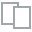
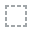
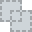
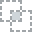
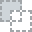
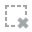
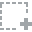
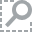
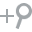
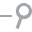
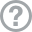
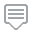
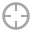
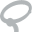
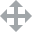
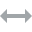
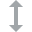
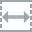
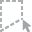
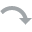
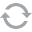
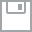
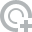
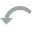
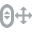
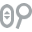
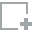
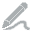
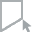
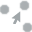
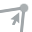
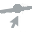

In [ ]:
  from dataprep.eda import create_report
create_report(baseEditWP)

# **3 - PRÉ-PROCESSAMENTO: PREPARAÇÃO DOS DADOS**

**1- Pre-processamento: transformação por codificação -  Substituição de coluna strings por numerica (categorica)**

**2- Pre-processamento: Redução por exclusão para redimensionamento do banco**

OBS: A retirada das colunas de data (firstDay, lastDay)  justificada pela coluna dia existente (NDays), já calculada e pronta no banco, deixa as de data irrelevantes para análise, e justificaria retirar por não ser variável relevante para o resultado que é a classificação do gênero, e já contar coluna de informação mais relevante derivada das duas(NDays).

**3- Pre-processamento:Ajuste das ordems de colunas dos dados**

In [ ]:
# limpeza e reordenação do baseEditWP: dataframe1=baseEditWPnum, dataframe2=baseEditWPstr

# dataframe1= baseEditWPnum ****** base com classe string
baseEditWP = pd.read_csv('/content/data.csv',sep=',')
baseEditWP['C_api']=baseEditWP['C_api'].replace({'unknown':0,'male':1,'female':2})
baseEditWP['C_api'] = baseEditWP['C_api'].astype(int)
baseEditWP['gender']=baseEditWP['gender'].replace({0:'unknown',1:'male',2:'female'})
baseEditWP['gender']=baseEditWP['gender'].astype(str)

# Remoção das colunas com data que ja´constam no dataframe coluna com o calculo de dias destas duas datas, e são mais imporantes para a classificação.
baseEditWP=baseEditWP.drop(columns=['firstDay'])
baseEditWP=baseEditWP.drop(columns=['lastDay'])

baseEditWP = baseEditWP[['E_NEds', 'E_Bpag', 'NEds', 'NDays',
       'NActDays', 'NPages', 'NPcreated', 'pagesWomen', 'wikiprojWomen',
       'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk', 'ns_content',
       'weightIJ', 'NIJ','C_man','C_api','gender']]

baseEditWPstr=baseEditWP


# dataframe2= baseEditWPnum****** base com classe numerica
#*************************************************************************************************
baseEditWP1 = pd.read_csv('/content/data.csv',sep=',')
baseEditWP1['C_api']=baseEditWP1['C_api'].replace({'unknown':0,'male':1,'female':2})
baseEditWP1['C_api'] = baseEditWP1['C_api'].astype(int)
baseEditWP1['gender']=baseEditWP1['gender'].astype(int)
# Remoção das colunas com data que ja´constam no dataframe coluna com o calculo de dias destas duas datas, e são mais imporantes para a classificação.
baseEditWP1=baseEditWP1.drop(columns=['firstDay'])
baseEditWP1=baseEditWP1.drop(columns=['lastDay'])

baseEditWP1 = baseEditWP1[['E_NEds', 'E_Bpag', 'NEds', 'NDays',
       'NActDays', 'NPages', 'NPcreated', 'pagesWomen', 'wikiprojWomen',
       'ns_user', 'ns_wikipedia', 'ns_talk', 'ns_userTalk', 'ns_content',
       'weightIJ', 'NIJ','C_man','C_api','gender']]
baseEditWPnum=baseEditWP1

In [ ]:
baseEditWPstr.head()


,E_NEds,E_Bpag,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ,C_man,C_api,gender
0,2,2,543,56,43,204,4,0,0,91,28,6,76,324,0.915024,978,1,1,male
1,3,1,2764,2345,514,722,7,0,0,100,249,183,646,1526,0.661673,477,3,0,unknown
2,0,2,57,2927,25,25,0,0,0,3,0,1,3,49,0.800528,664,1,1,male
3,1,2,104,67,5,66,2,0,0,20,1,2,2,78,1.027717,841,1,1,male
4,1,1,184,2798,27,125,0,0,0,26,10,5,24,112,0.997535,994,3,0,unknown


In [ ]:
baseEditWPnum.head()

,E_NEds,E_Bpag,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ,C_man,C_api,gender
0,2,2,543,56,43,204,4,0,0,91,28,6,76,324,0.915024,978,1,1,1
1,3,1,2764,2345,514,722,7,0,0,100,249,183,646,1526,0.661673,477,3,0,0
2,0,2,57,2927,25,25,0,0,0,3,0,1,3,49,0.800528,664,1,1,1
3,1,2,104,67,5,66,2,0,0,20,1,2,2,78,1.027717,841,1,1,1
4,1,1,184,2798,27,125,0,0,0,26,10,5,24,112,0.997535,994,3,0,0


# **4 - MODELAGEM: EXPERIMENTO APLICADO AOS MÉTODOS**


## **Método K-NN**

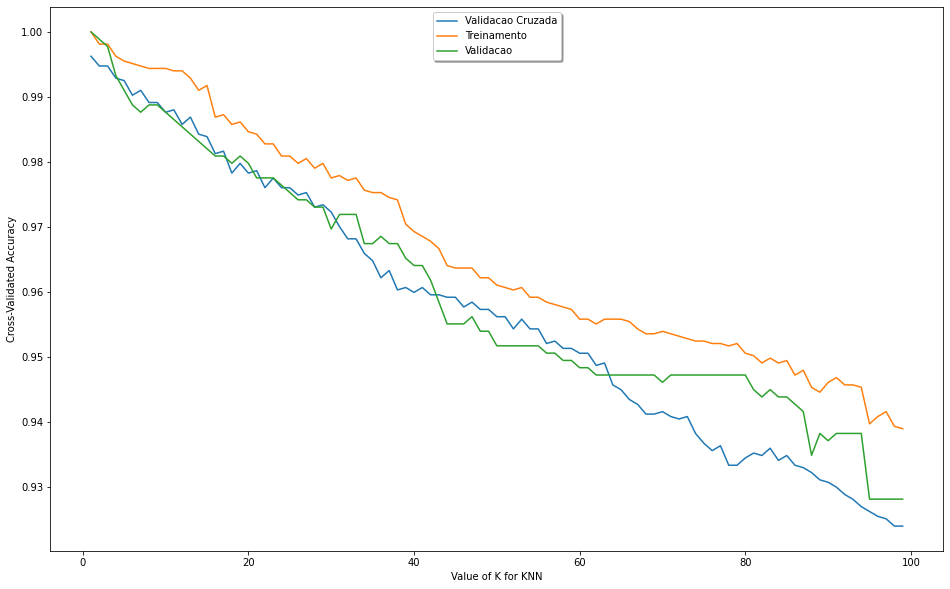

In [ ]:
# K-NN

#divisao de dados atributos e classe baseEditWPnum
X = baseEditWPnum.values[:, 0:baseEditWPnum.shape[1]-1] #caracteristicas
Y = baseEditWPnum.values[:, baseEditWPnum.shape[1]-1] #classe

#Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#usando o metodo para fazer divisao com validação do treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

k_range = range(1, 100) #k
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# iteração para calcular diferentes k em modelos e, em seguida, retorne a precisão média com base na validação cruzada
for j in k_range:
  knn = neighbors.KNeighborsClassifier(n_neighbors=j)
  scores = cross_val_score(knn, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
  k_scores_train.append(scores.mean())
  knn.fit(X_train_cv, y_train_cv)
  k_scores_train_full.append(knn.score(X_train_cv, y_train_cv))
  k_scores_valid.append(knn.score(X_valid, y_valid))

# plot to see clearly
plt.plot(list(range(1,len(k_scores_train)+1)), k_scores_train)
plt.plot(list(range(1,len(k_scores_train_full)+1)), k_scores_train_full)
plt.plot(list(range(1,len(k_scores_valid)+1)), k_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### **Acurácia -Treino e Teste - K-NN**


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=20)
clf = clf.fit(X_train, y_train)

print("Acuracia de treinamento clf K-NN: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf K-NN: %0.3f" %  clf.score(X_test, y_test))

Acuracia de treinamento clf K-NN: 0.990
Acuracia de teste clf K-NN: 0.981


## **Método LVQ**

In [ ]:
pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 226 kB 4.3 MB/s 
     |████████████████████████████████| 92.7 MB 26 kB/s 
     |████████████████████████████████| 3.2 MB 23.4 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 367 kB 41.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
  Attempting uninstall: progressbar2
    Found existing installatio

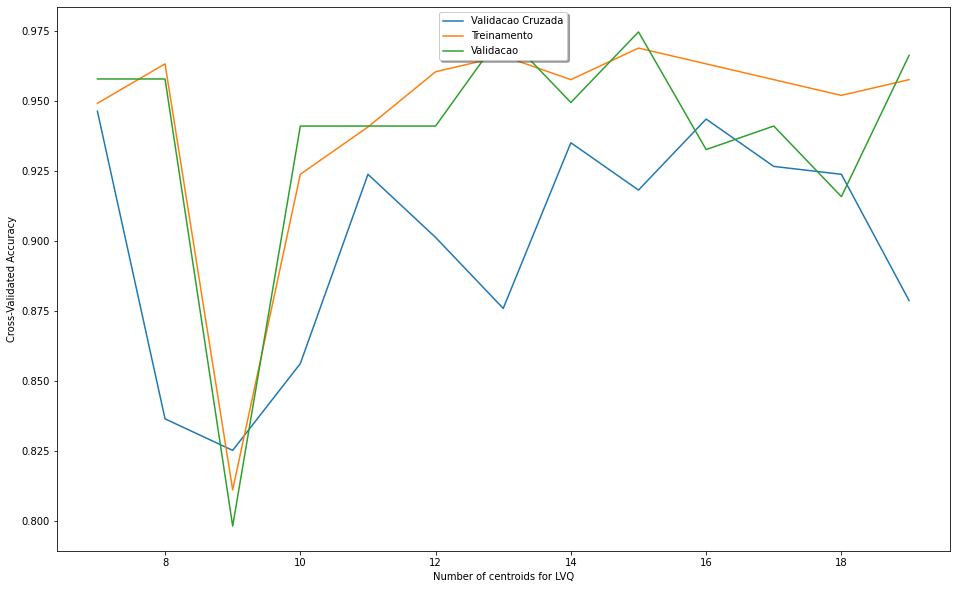

In [ ]:
# LVQ
from neupy import algorithms


#divisao de dados atributos e classe
X = baseEditWPnum.values[:, 0:len(baseEditWPnum.values[0])-1] #caracteristicas
Y = baseEditWPnum.values[:, len(baseEditWPnum.values[0])-1] #classe

#Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#usando o metodo para fazer divisao com validação do treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.90, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

# criamos uma instância do Neighbors Classifier e ajustamos os dados.
p_range = range(7, 20)
p_scores_train = []
p_scores_train_full = []
p_scores_valid = []

# use iteração para calcular k diferentes em modelos e, em seguida, retorne a precisão média com base na validação cruzada
for p in p_range:
    lvqnet = algorithms.LVQ(n_inputs=20, n_classes=3, n_subclasses=p)
    scores = cross_val_score(lvqnet, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
    p_scores_train.append(scores.mean())
    lvqnet.train(X_train_cv, y_train_cv, epochs=20)
    p_scores_train_full.append(accuracy_score(lvqnet.predict(X_train_cv), y_train_cv))
    p_scores_valid.append(accuracy_score(lvqnet.predict(X_valid), y_valid))

# enredo para ver claramente
plt.plot(p_range, p_scores_train)
plt.plot(p_range, p_scores_train_full)
plt.plot(p_range, p_scores_valid)
plt.legend(('Validacao Cruzada', 'Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Number of centroids for LVQ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### **Acurácia -Treino e Teste - LVQ**

In [ ]:
lvqnet = algorithms.LVQ(n_inputs=20, n_classes=3, n_subclasses=10)
lvqnet.train(X_train_cv, y_train_cv, epochs=20)

print("Acuracia de treinamento clf LVQ: %0.3f" %  accuracy_score(lvqnet.predict(X_train_cv),y_train_cv))
print("Acuracia de teste clf LVQ: %0.3f" %  accuracy_score(lvqnet.predict(X_test), y_test))

Acuracia de treinamento clf LVQ: 0.972
Acuracia de teste clf LVQ: 0.956


## **Método SVM** 

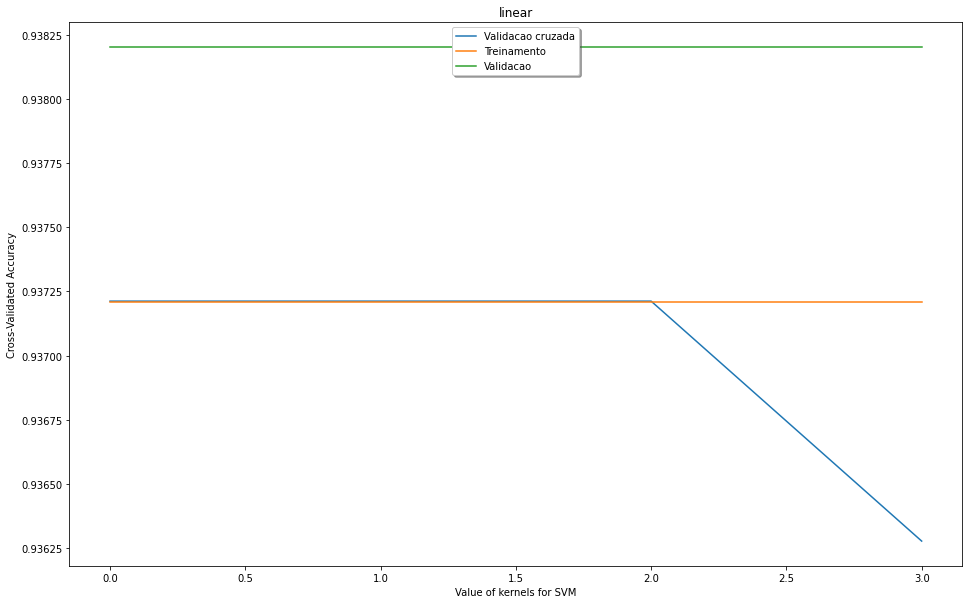

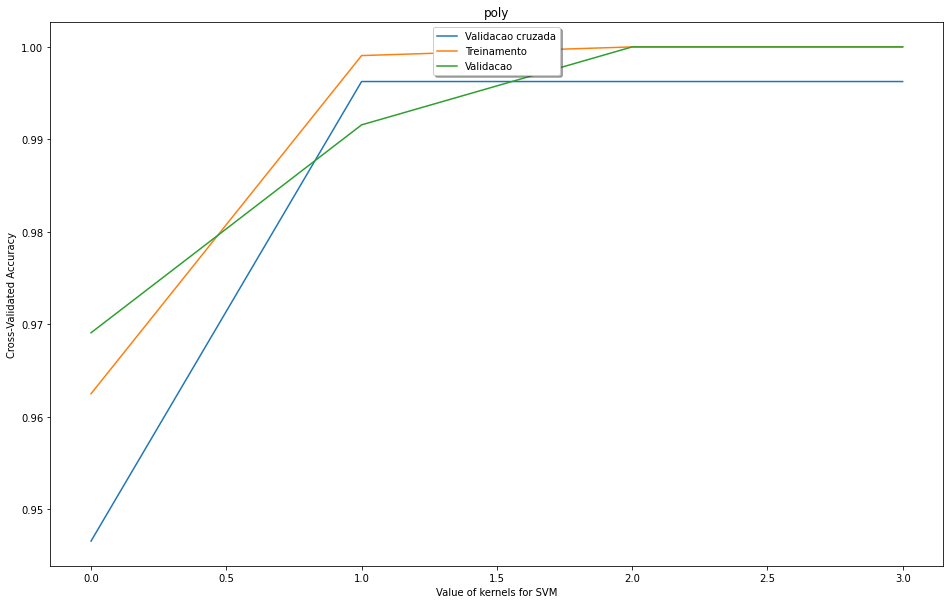

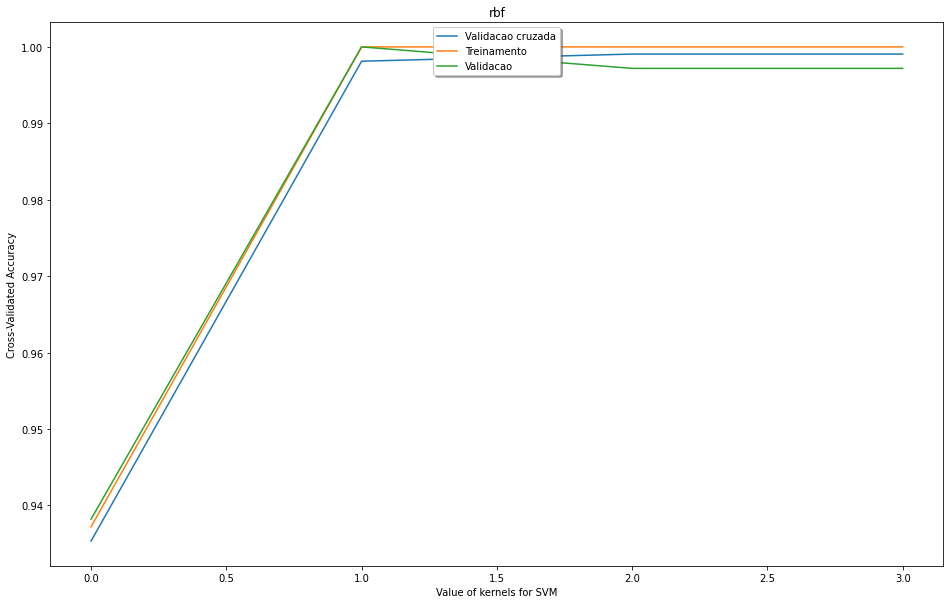

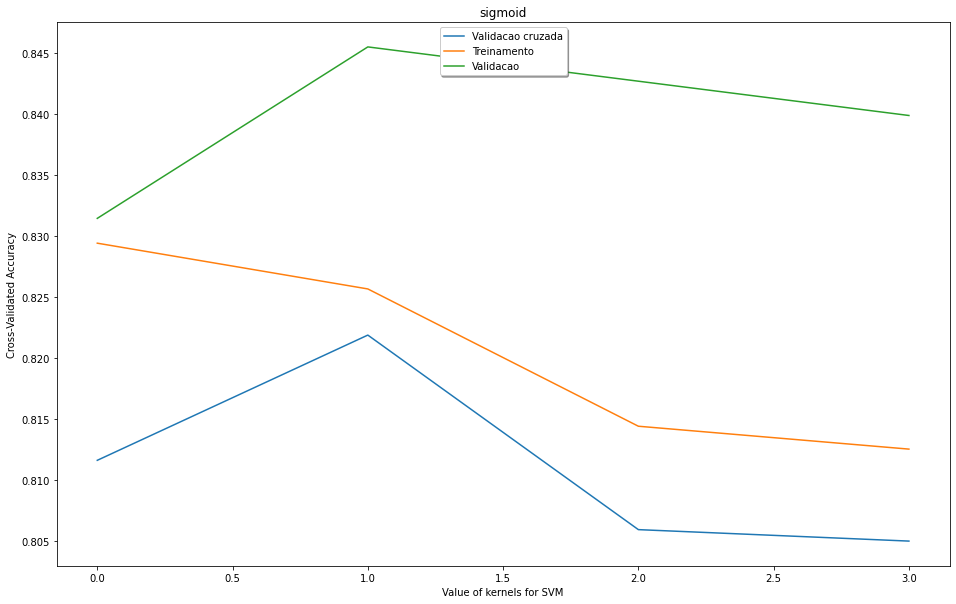

In [ ]:
#SVM

#divisao de dados atributos e classe
X = baseEditWPnum.values[:, 0:baseEditWPnum.shape[1]-1] #caracteristicas
Y = baseEditWPnum.values[:, baseEditWPnum.shape[1]-1] #classe

#Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#usando o metodo para fazer divisao com validação do treinamento
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.7, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

kernels_range = ['linear', 'poly', 'rbf', 'sigmoid']
c_range =[0.1,10,50,150]


# usar iteração para calcular k diferentes em modelos e, em seguida, retorne a precisão média com base na validação cruzada
for kernel in kernels_range:
    k_scores_train = []
    k_scores_valid = []
    k_scores_cross = []

    for c in c_range:
        svc = SVC(C=c, random_state=10, kernel=kernel)
        scores = cross_val_score(svc, X_train_cv, y_train_cv, cv=5, scoring='accuracy')
        k_scores_cross.append(scores.mean())
        svc.fit(X_train_cv, y_train_cv)
        k_scores_train.append(svc.score(X_train_cv, y_train_cv))
        k_scores_valid.append(svc.score(X_valid, y_valid))

    # plot to see clearly
    plt.plot(list(range(0,len(k_scores_cross))), k_scores_cross)
    plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
    plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
    plt.title(f'{kernel}')
    plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
              loc='upper center', shadow=True)
    plt.xlabel('Value of kernels for SVM')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

### **Acurácia -Treino e Teste - SVM**

In [ ]:
clf = SVC(C=100, random_state=10, kernel='rbf')
clf.fit(X_train, y_train)

print("Acuracia de treinamento clf SVM: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf SVM: %0.3f" %  clf.score(X_test, y_test))

Acuracia de treinamento clf SVM: 1.000
Acuracia de teste clf SVM: 0.998


## **Método Random Forest** 



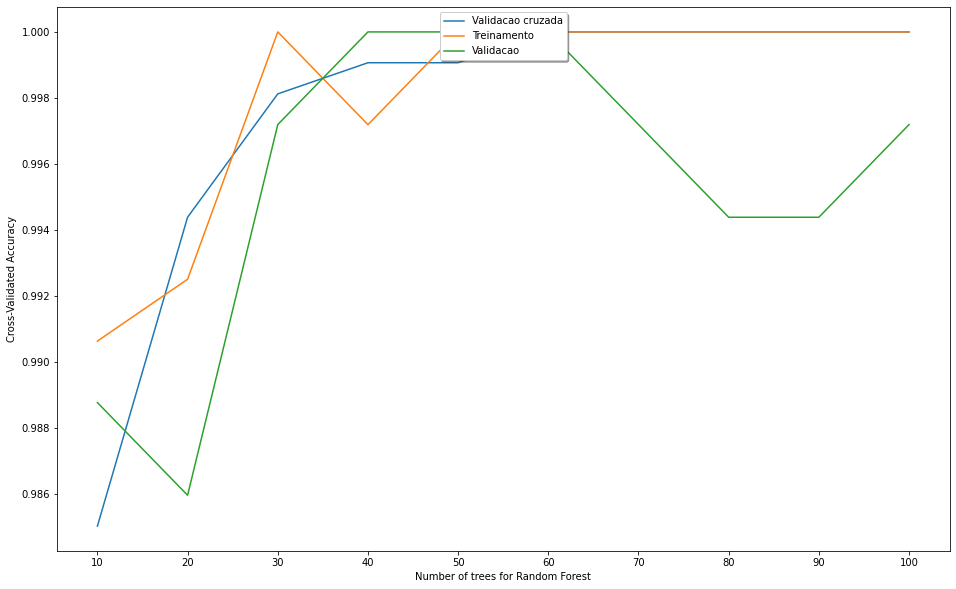

In [ ]:
# Random Forest

#divisao de dados atributos e classe
X = baseEditWPstr.values[:, 0:baseEditWPstr.shape[1]-1] #caracteristicas
Y = baseEditWPstr.values[:, baseEditWPstr.shape[1]-1] #classe

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.70, random_state=10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

num_trees_range = range(10, 101, 10)
max_features = 6

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

cross_scores = []
train_scores = []
valid_scores = []

for num_trees in num_trees_range:
    #criando o classificador Random Forest
    model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=10, max_depth=5)

    #treinamento do Random Forest em dez folds
    results = model_selection.cross_val_score(model_rf, X_train_cv, y_train_cv, cv=kfold)
    model_rf = model_rf.fit(X_train_cv, y_train_cv)
    cross_scores.append(results.mean())
    train_scores.append(model_rf.score(X_train_cv, y_train_cv))
    valid_scores.append(model_rf.score(X_valid, y_valid))


# plot to see clearly
plt.plot(num_trees_range, cross_scores)
plt.plot(num_trees_range, train_scores)
plt.plot(num_trees_range, valid_scores)
plt.legend(('Validacao cruzada', 'Treinamento', 'Validacao'),
          loc='upper center', shadow=True)
plt.xticks(num_trees_range, num_trees_range)
plt.xlabel('Number of trees for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


### **Acurácia -Treino e Teste - Random Forest**

In [ ]:
# Random Forest Classification
#dimensoes da base de dados
print(baseEditWPstr.shape)

#convertendo os valores da base para array
array = baseEditWPstr.values
X = array[:,0:18]
Y = array[:,18]

#semente de numeros aleatorios
seed = 7

num_trees = 55
max_features = 10
#[3 5 10 20 50 100 500]

#divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

#criando o classificador Random Forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

#treinamento do Random Forest em dez folds
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold)

model_rf = model_rf.fit(X_train,y_train)

print("Random Forest folds:", results, "\nMedia treinamento: " ,results.mean())
print("Treinamento: ", model_rf.score(X_train,y_train))
print("Teste: ", model_rf.score(X_test,y_test))

#criando a arvore de decisao
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=seed)

#treinamento da arvores de decisao em dez folds
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
clf = clf.fit(X_train,y_train)

print("\nDecision Tree folds", results, "\nMedia treinamento: ",results.mean())
print("Treinamento: ", clf.score(X_train,y_train))
print("Teste: ", clf.score(X_test,y_test))


(4746, 19)
Random Forest folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
Media treinamento:  1.0
Treinamento:  1.0
Teste:  1.0

Decision Tree folds [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
Media treinamento:  1.0
Treinamento:  1.0
Teste:  1.0


In [ ]:
model_rf_final = RandomForestClassifier(n_estimators=60, max_features=max_features, random_state=10)
model_rf_final = model_rf_final.fit(X_train, y_train)

print("Treinamento RandomForest: ", model_rf_final.score(X_train, y_train))
print("Teste RandomForest: ", model_rf_final.score(X_test,y_test))

Treinamento RandomForest:  1.0
Teste RandomForest:  1.0


## **Método Árvore de Decisão simples**

In [ ]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


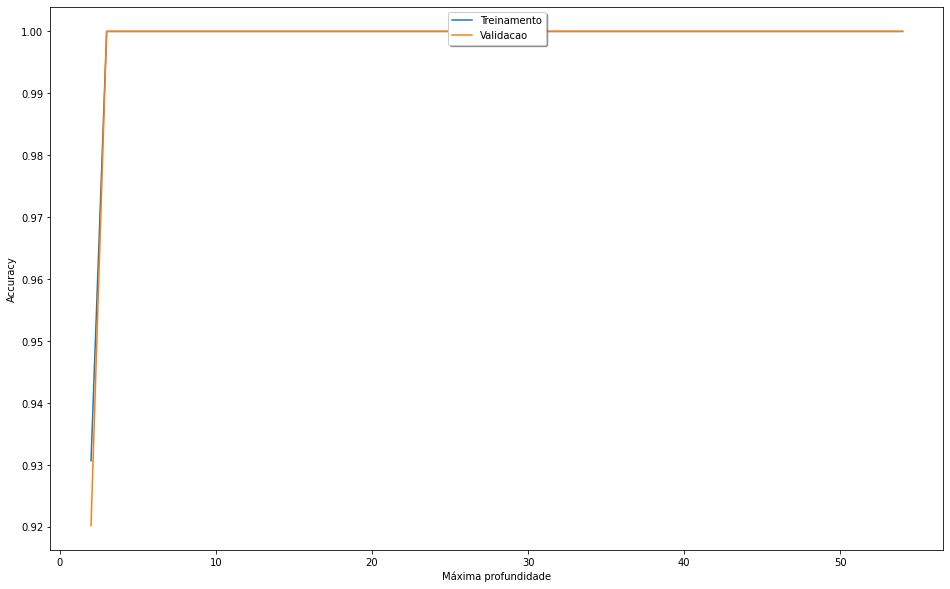

In [ ]:
# ÁRVORE DE DECISÃO SIMPLES

#divisao de dados atributos e classe
X = baseEditWPstr.values[:, 0:baseEditWPstr.shape[1]-1] #caracteristicas
Y = baseEditWPstr.values[:, baseEditWPstr.shape[1]-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

#criando diferentes arvores
depth_range = range(2, 55)
train_score = []
valid_score = []

for d in depth_range:
    tree1 = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state = 10)
    tree1.fit(X_train_cv, y_train_cv)
    train_score.append(tree1.score(X_train_cv, y_train_cv))
    valid_score.append(tree1.score(X_valid, y_valid))

plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)
plt.legend(('Treinamento', 'Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Máxima profundidade')
plt.ylabel('Accuracy')
plt.show()


### **Acurácia -Treino e Teste - Arvore da Decisão**

In [ ]:
tree_final = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = 10)
tree_final.fit(X_train_cv, y_train_cv)

print("Acuracia de treinamento da Árvore de Decisão: %0.3f" %  tree_final.score(X_train, y_train))
print("Acuracia de validacao da Árvore de Decisão: %0.3f" %  tree_final.score(X_test, y_test))


Acuracia de treinamento da Árvore de Decisão: 1.000
Acuracia de validacao da Árvore de Decisão: 1.000


|--- C_man <= 1.50
|   |--- class: male
|--- C_man >  1.50
|   |--- C_api <= 0.50
|   |   |--- C_man <= 2.50
|   |   |   |--- class: female
|   |   |--- C_man >  2.50
|   |   |   |--- class: unknown
|   |--- C_api >  0.50
|   |   |--- C_api <= 1.50
|   |   |   |--- class: male
|   |   |--- C_api >  1.50
|   |   |   |--- class: female

              precision    recall  f1-score   support

      female       1.00      1.00      1.00        97
        male       1.00      1.00      1.00       707
     unknown       1.00      1.00      1.00       383

    accuracy                           1.00      1187
   macro avg       1.00      1.00      1.00      1187
weighted avg       1.00      1.00      1.00      1187



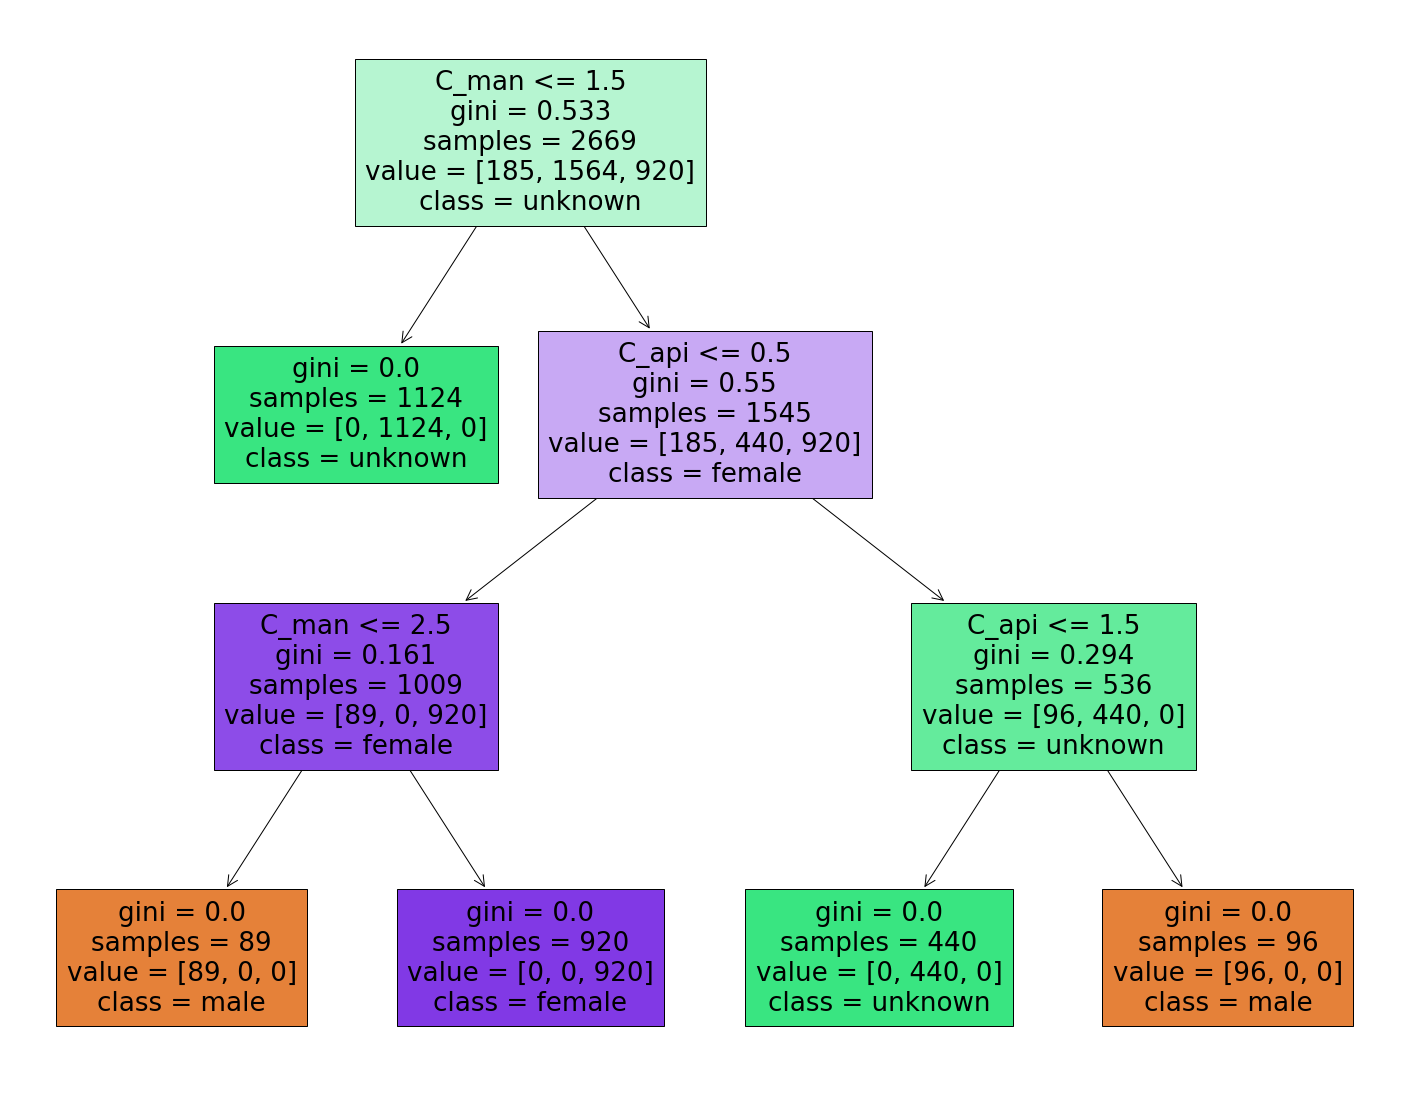

In [ ]:
feat_names = list(baseEditWPstr.columns)
class_names = baseEditWPstr['gender'].unique().tolist()

#apresentacao da arvore em texto
text_representation = tree.export_text(tree_final, feature_names=feat_names[0:len(feat_names)-1])
print(text_representation)

#apresentacao usando o plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_final, 
                   feature_names=feat_names,  
                   class_names=class_names,
                   filled=True)
#para salvar a imagem
fig.savefig("decistion_tree.png")

# Criando modelo e treinando com os dados de treino
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc = dtc.fit(X_train, y_train)
# Fazendo a predição nos dados de treino
resultado_dtc = dtc.predict(X_test)
print(classification_report(y_test, resultado_dtc))


#utilizando o graphiz
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_final, out_file=None, 
                                feature_names=feat_names[0:len(feat_names)-1],  
                                class_names=class_names,
                                filled=True)

## **AVALIAÇÃO ARVORE SIMPLES**

## A **C_man** é a primeira caracteristica selecionada para a  divisão da árvore simples, o que significando que é a melhor em termos de "diminuição de impurezas" no nó que contém todas as amostras de treinamento. Esta variável C_man representa segundo os autores do artigo o gênero extraído da codificação do conteúdo de paginas especificadas, cofificados sendo 1(masculino), 2(feminino), e 3(desconhecido).

## **Método Comitê heterogêneo** 

### **Validação e Teste - Comitê Heterogênio**

In [ ]:
# Comitê heterogenio

#divisao de dados atributos e classe
X = baseEditWPstr.values[:, 0:baseEditWPstr.shape[1]-1] #caracteristicas
Y = baseEditWPstr.values[:, baseEditWPstr.shape[1]-1] #classe

#Normalização
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

kfold = StratifiedKFold(n_splits=10)

# create the sub models
estimators = []
model1 = neighbors.KNeighborsClassifier(n_neighbors=20)
estimators.append(('knn', model1))

model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = 10)
estimators.append(('decision_tree', model2))

model3 = SVC(C=100, random_state=10, kernel='rbf')
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print('cross validation score Comitê heterogênio =', results.mean())

ensemble.fit(X_train, y_train)

print('test score Comitê heterogênio=', ensemble.score(X_test, y_test))

cross validation score Comitê heterogênio = 0.9997191011235955
test score Comitê heterogênio= 1.0


# **5 - COMPARANDO OS ALGORITMOS**

Apresentando o shape dos dados baseEditWP (dimenssoes)
(4746, 19)
=========Random Search Results for TREE==========
Best Score: 1.0
Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
=========Random Search Results for SVM==========
Best Score: 0.5937062826396582
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}

Desempenhos medios dos modelos:
Arvore: 1.000000 (0.000000)
SVM: 0.593706 (0.002187)
ComiteArvore: 0.998876 (0.001863)
RedeNeural: 0.591739 (0.001258)
ComiteRede: 0.591739 (0.001258)

Different distributions (reject H0)

Comparison stats 40.80183443085604
Comparacao Arvore | SVM -> KruskalResult(statistic=16.6083916083916, pvalue=4.594727431524013e-05)
Comparacao Arvore | ComiteArvore -> KruskalResult(statistic=3.3333333333333126, pvalue=0.06788915486182948)
Comparacao Arvore | RedeNeural -> KruskalResult(statistic=16.873889875666066, pvalue=3.9947332345823085e-05)
Comparacao Arvore | CRNA -> KruskalResult(st

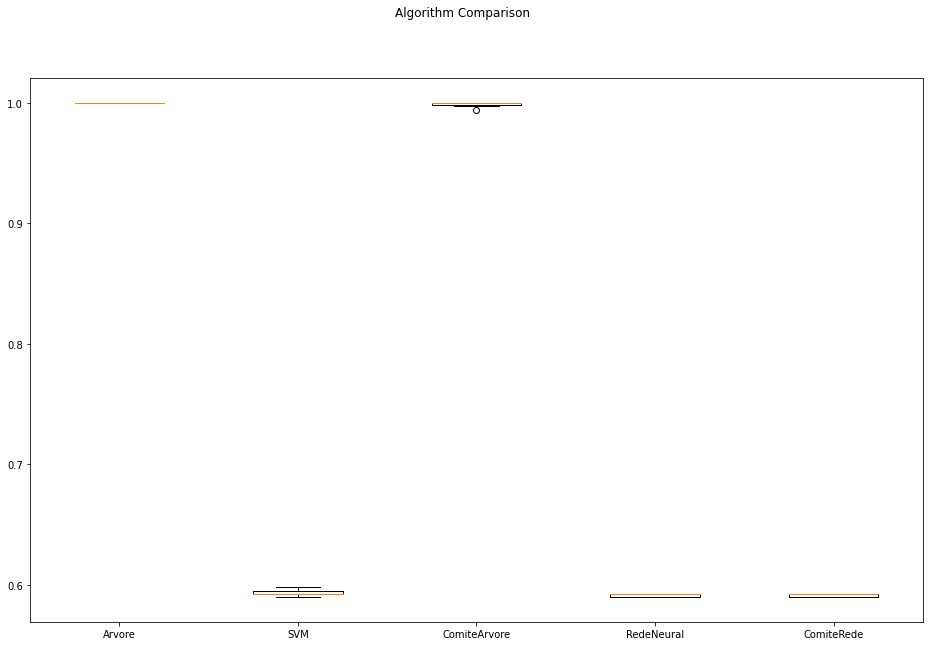

In [ ]:
#@title **Comparação Modelos: SVM, Arvore de Decisão, Random Florest, Rede Neural, MLP, Comitê de Redes Neurais:**


#2. Definicao da semente para geracao de numereos aleatorios
#Intialise a random number generator
# Set a seed value
seed_value= 12321 

# 1. Set 'PYTHONHASHSEED' environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set 'python' built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)


#5. Preparacao dos dados conduzida em outro script
print("Apresentando o shape dos dados baseEditWP (dimenssoes)")
print(baseEditWPstr.shape)
array = baseEditWPstr.values
X = array[:,0:18]
Y = array[:,18]

#6. Divisao da base de dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed_value)

#X_train_p, X_valid, y_train_p, y_valid = train_test_split(X_train, y_train, random_state=seed)

#7. Realizar busca com o gridsearch ou randonsearhc para encontrar os melhores parametros de cada modelo
# define models
decisionTree = DecisionTreeClassifier()
svc = SVC()

# define evaluation
cv = model_selection.StratifiedKFold(n_splits=10)

# define search space for decision tree
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [2, 3]

# defining parameter range for svm
param_grid = {'C': [0.1, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# define random search for decision tree
search = RandomizedSearchCV(decisionTree, space, n_iter=50, scoring='accuracy', n_jobs=4, cv=cv)

# execute search
result_tree = search.fit(X_train, y_train)

# summarize result for decision tree
print('=========Random Search Results for TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

# define random search for SVM
search = RandomizedSearchCV(svc, param_grid, n_iter=10, scoring='accuracy', n_jobs=4, cv=cv, random_state=seed_value)

# execute search
result_svc = search.fit(X_train, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)


#8. Definicao dos modelos de classificacao com as melhores configuracoes
# criacao dos modelos com os melhores parametros
RFC = RandomForestClassifier(n_estimators=10,random_state=seed_value)
svc = result_svc.best_estimator_
DTC = result_tree.best_estimator_   #tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=seed_value)
BMLP = BaggingClassifier(base_estimator=MLP, n_estimators=10, random_state=seed_value)

#adiciona os modelos em uma lista
models = []
models.append(('Arvore', DTC))
models.append(('SVM', svc))
models.append(('ComiteArvore', RFC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))
# evaluate each model in turn
results = []
names = []
#deficao da metrica a ser utilizada
scoring = 'accuracy'

#9. Definicao do modelo experimental
#amostragem estratificada
#kfold = cv

#10 Execucao do modelo experimental
#avaliacao de cada modelo nas amotragens estratificas
print('\nDesempenhos medios dos modelos:')
for name, model in models:
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

#11 Comparacao de modelos
# Teste de hipotese analisando o p-value
stat, p = stats.kruskal(results[0],results[1],results[2],results[3],results[4])
alpha = 0.05
if p > alpha:
	print('\nSame distributions (fail to reject H0)')
else:
	print('\nDifferent distributions (reject H0)')
 
print('\nComparison stats', stat)

print('Comparacao Arvore | SVM ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[3]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[4]))
print('Comparacao SVM | RedeNeural ->',stats.kruskal(results[2],results[3]))
print('Comparacao SVM | ComiteRede ->',stats.kruskal(results[2],results[4]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[3],results[4]))	

#treinamento dos modelos no conjunto de treino completo (sem divisao de validacao)
RFC.fit(X_train, y_train);
svc.fit(X_train, y_train);
DTC.fit(X_train, y_train);
MLP.fit(X_train, y_train);
BMLP.fit(X_train, y_train);

#predicao de cada modelo para a base de teste
Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_SVC = svc.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

#12 Apresentacao de resultados
print("\nAcuracia Comite de Arvore: Treinamento",  RFC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RFC))

print("\nAcuracia SVC: Treinamento",  svc.score(X_train, y_train)," Teste" ,svc.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_SVC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_SVC))

print("\nAcuracia Arvore: Treinamento",  DTC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_DTC))

print("\nAcuracia Rede Neural: Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_MLP))

print("\nAcuracia Comite RNA: Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()	


In [ ]:
print(result.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)


In [ ]:
#@title **5.1 - Teste de Significância Estatistica**
# Significance stats tests
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.325
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=6.051, p=0.049
Different distributions (reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)


In [ ]:
#@title **5.2- Resultados do Hiperparâmetro:**
# random search decision tree model base editoras wikipedia

#Leitura dos dados  
#Preparacao dos dados conduzida em outro script
print("Apresentando o shape dos dados (dimenssoes)")
print(baseEditWPstr.shape)
array = baseEditWPstr.values
X = array[:,0:18]
y = array[:,18]

# define model
model = DecisionTreeClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,5,7]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19]
space['min_samples_leaf'] = [2, 3]

# define random search
search = RandomizedSearchCV(model, space, n_iter=20, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

# summarize result
print('=========Random Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# define grid search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

print('=========Grid Search Results==========')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



Apresentando o shape dos dados (dimenssoes)
(4746, 19)
=========Random Search Results==========
Best Score: 1.0
Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'gini'}
=========Grid Search Results==========
Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [ ]:
print(result.best_estimator_)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)


#**6 - AVALIAÇÃO: APRESENTAÇÃO DOS RESULTADOS - METODOLOGIA CRISP-DM**

**1.1 Contextualização: Conhecimento da área de abordagem (o negocio)**

objetivo geral do artigo foi o de analisar o viés de gênero presente no Wikipédia que apesar de sua suposta neutralidade, está sujeita aos mesmos preconceitos que qualquer outra fonte de conhecimento e informação. 

Como fonte de estudos foi utilizado a base de dados da Wikipédia espanhola, com mais de 1.580.000 páginas. Destacou-se o fato de que os artigos sobre homens superam aqueles sobre mulheres e que a maioria dos editores são homens. 

**1.2 -Identificação do Problema:**

**Geral:** *Como identificar participação das mulheres em relação aos homens na base disponivel?*

 **Específicos:**Como Business Understanding do artigo teríamos os seguintes questionamentos: quantas mulheres estão entre os editores ativos na Wikipédia espanhola? Qual é a porcentagem de mulheres entre os editores ativos? Qual é a convergência entre o procedimento de codificação e os dados fornecidos por API do MediaWiki? 

  Para isso existem três maneiras diferentes de medir a presença de mulheres editoras na Wikipedia de acordo com a base de dados disponível. A primeira é analisando o perfil do editor da Wikipedia, metadados, que oferece três opções: gênero neutro, mulher e homem. A segunda maneira é a de estimar o número de mulheres  presentes na Wikipédia e a terceira é a de utilizar algoritmos de aprendizado de máquina prontos para revelar traços pessoais não revelados, como gênero,  a partir do engajamento do editor. 

**2. Entendimento dos Dados - Análise Exploratória:**

Foi importada a base csv em dataframe, e aplicado o create_report (dataprev), para gerar um conjunto de visualizações exploratória das variaveis da base.
      
**3. Preparação dos dados - Pré-Processamento:**
  
  Demandou gerar **dois dataframes** com a variavel classificadora de tipos diferentes (um com esta variavel de classe em tipo **númerico** e outro com esta variavel tipo **string** ) , a serem aplicados em modelos específicos que demandam esta configuração.
  Dando inicio ao tratamento da base, foi preciso fazer uma limpeza e reordenação da base de dados no qual foi retirado algumas colunas que demonstrava exercer uma irrelevante importância para com a análise principal que é a de classificação de gênero, também precisou ser feita a reorganização da sua estrutura para que melhor fosse trabalhado em cima dos códigos disponíveis.

**4. Modelagem:**

  Utilizamos na modelagem de dados os metódos: KNN, LVQ, SVM, RANDON FORREST E ÁRVORE DE DECISÃO SIMPLES, COMITÊ HETEROGÊNIO (K-NN, ÁRVORE DE DECISÃO, SVM), COMPARAÇÃO DE ALGORITMOS (SVM,ÁRVORE DE DECISÃO, RANDOM FLOREST, REDE NEURAL, MLP, COMITÊ DE REDES NEURAIS), TESTE DE SIGNIFICÂNCIA ESTATÍSTICA E HIPERPARÂMETRO.
  
**5. Avaliação:**
  
**5.1 Do primeiro atributo selecionado na Árvore de Decisão Simples:**  

A **C_man **é á primeira caracteristica selecionada para a  divisão da árvore simples, o que significando que é a melhor em termos de "diminuição de impurezas" no nó que contém todas as amostras de treinamento. Esta variável C_man representa segundo os autores do artigo o gênero extraído da codificação do conteúdo de paginas especificadas, cofificados sendo 1(masculino), 2(feminino), e 3(desconhecido).


**5.2 Dos Resultados:**  
  O Melhor estimador apontado (**best_estimator:DecisionTreeClassifier**) é o  **método de árvore de decisão simples** com maior  resultado calculado (apresentando **separação ótima das 03 classes, com dados homogênios)**, que concordou com os valores da variavel C_Man da  codificação dos autores do artigo, apresentando valor de parâmetro gini=0 (só atributos da mesma classe) nos três itens classificados nos **nós-folhas**.

**6. Implementação:** 

O Projeto consiste em   trabalho com modelos para fins da aprendizagem supervisionada, sem gerar deste um programa final a ser implementado.